In [1]:
import math
import numpy as np
import pandas as pd
from numba import njit
from numba import jit
!python -m pip install yfinance
import yfinance as yf
import time
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
plot_width = 15
plot_length = 3
lookback = 5

In [3]:
extract_obj = yf.Ticker("AAPL")
data = extract_obj.history(period="1y")
data['Typical Price'] = ((data['High'] + data['Low'] + data['Close']) / 3).round(2)
data = data.iloc[-50:]
price_list = np.array(data['Typical Price'])

In [4]:
#price_list - numpy array list
#lookback - integer
def mcg(price_array, lookback):
    out_array = np.array([None for i in range(lookback)])
    
    sum_var = np.sum(price_array[0:lookback])
    base_val = (sum_var/lookback)
    out_array = np.append(out_array,base_val)
    
    for i in range(price_array.size - lookback - 1):
        price_t = price_array[i + lookback + 1]
        add_val = (price_t - base_val)
        frac = (price_t/base_val)**4 
        denom = frac*lookback
        out_val = base_val + add_val/denom
        
        out_array = np.append(out_array,out_val)
        base_val = out_val
    return out_array


In [5]:
start = time.time()
x1 = mcg(price_list,lookback)
end = time.time()
print(x1)
function_time = end - start

[None None None None None 122.744 122.65390343660228 122.67504948830835
 122.27846676941623 121.83555614982636 121.51908983748979
 121.48710470198209 121.06713702854596 121.26119920745948
 121.59148971968169 122.17454819313502 122.8694346650865
 123.55787614784515 124.54814145271172 125.68091332949358
 126.63129947393558 127.73695936223187 128.58481140021775
 129.5243310404737 130.2768193655219 130.99240068640364 131.41583054818256
 131.64803590984621 131.77203062878263 132.12517056387264
 132.5185865195036 132.87602172912378 133.0310779834145 133.24000174774008
 132.94138673172907 132.87036142949404 131.86077158860587
 131.14478176732257 130.60598193249467 130.54828183038646
 129.9332077737884 128.77593669000012 127.45037075068419
 126.95090465588302 126.97264888463508 126.7974605859216
 126.53573986781414 126.02316784137837 126.15758002061806
 126.16804660967867]


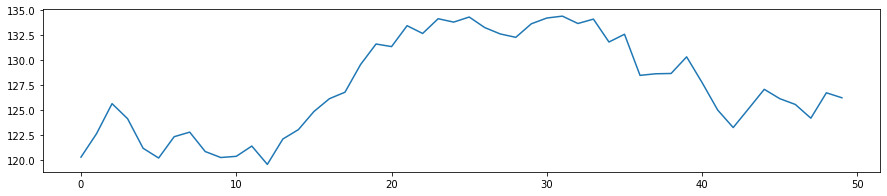

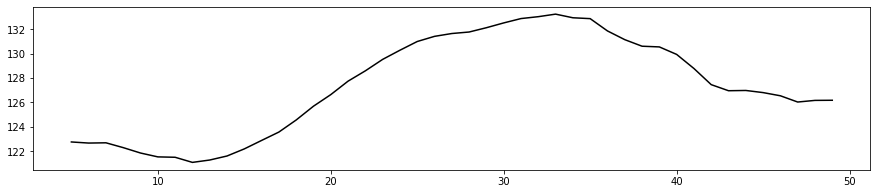

In [6]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(plot_width, plot_length))
ax1 = plt.subplot()
plt.plot(np.arange(price_list.size), price_list)

figure(figsize=(plot_width, plot_length))
ax2 = plt.subplot()
plt.plot(np.arange(x1.size), x1, color = 'black')
plt.show()

In [10]:
def env_mcg_gen(price_array, lookback, multiplier = 0.02):
    up_bound_array = np.array([None for i in range(price_array.size)])
    down_bound_array = np.array([None for i in range(price_array.size)])
    
    def mcg(price_array, lookback):
        out_array = np.array([None for i in range(lookback)])

        sum_var = np.sum(price_array[0:lookback])
        base_val = (sum_var/lookback)
        out_array = np.append(out_array,base_val)

        for i in range(price_array.size - lookback - 1):
            price_t = price_array[i + lookback + 1]
            add_val = (price_t - base_val)
            frac = (price_t/base_val)**4 
            denom = frac*lookback
            out_val = base_val + add_val/denom

            out_array = np.append(out_array,out_val)
            base_val = out_val
        return out_array


    mcg_arr = mcg(price_array, lookback)
    for i in range(price_array.size - lookback):
        up_bound_array[i+lookback] = mcg_arr[i+lookback] + (mcg_arr[i+lookback]*multiplier)
        down_bound_array[i+lookback] = mcg_arr[i+lookback] - (mcg_arr[i+lookback]*multiplier)

    return up_bound_array,mcg_arr,down_bound_array

In [11]:
start = time.time()
up_bol, mcg_array, down_bol = env_mcg_gen(price_array = price_list, lookback = lookback, multiplier = 0.02)
end = time.time()
print(up_bol)
print(mcg_array)
print(down_bol)
indic_generation_time = (end-start)

[None None None None None 125.19888 125.10698150533432 125.12855047807452
 124.72403610480455 124.27226727282289 123.94947163423959
 123.91684679602173 123.48847976911688 123.68642319160867
 124.02331951407533 124.61803915699772 125.32682335838822
 126.02903367080205 127.03910428176596 128.19453159608344
 129.1639254634143 130.2916985494765 131.1565076282221 132.11481766128318
 132.88235575283235 133.61224870013172 134.0441471591462
 134.28099662804314 134.40747124135828 134.7676739751501
 135.16895824989368 135.53354216370624 135.6916995430828
 135.90480178269488 135.60021446636364 135.52776865808391 134.497987020378
 133.76767740266902 133.21810157114456 133.15924746699417
 132.53187192926418 131.35145542380013 129.99937816569786
 129.48992274900067 129.51210186232777 129.33340979764003
 129.06645466517043 128.54363119820593 128.68073162103042
 128.69140754187225]
[None None None None None 122.744 122.65390343660228 122.67504948830835
 122.27846676941623 121.83555614982636 121.519089

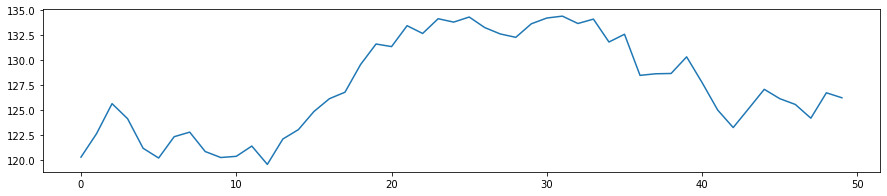

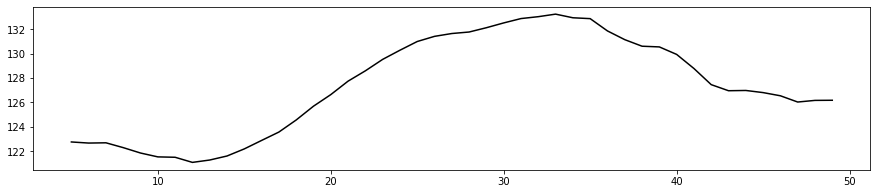

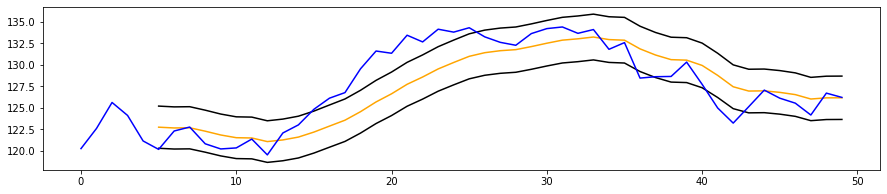

In [12]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(plot_width, plot_length))
ax1 = plt.subplot()
plt.plot(np.arange(price_list.size), price_list)

figure(figsize=(plot_width, plot_length))
ax2 = plt.subplot()
plt.plot(np.arange(x1.size), x1, color = 'black')

figure(figsize=(plot_width, plot_length))
ax3 = plt.subplot()
plt.plot(np.arange(up_bol.size), up_bol, color = 'black')
plt.plot(np.arange(mcg_array.size), mcg_array, color = 'orange')
plt.plot(np.arange(down_bol.size), down_bol, color = 'black')
plt.plot(np.arange(price_list.size), price_list, color = 'blue')
plt.show()

In [13]:
def current_bias(price_array, up_bound_array, down_bound_array):
    bias = 0
    bias_list = []
    for i,j,k in zip(price_array,up_bound_array, down_bound_array):
        try: 
            if(i >= j):
                bias = 100
            elif(i <= k):
                bias = -100
            elif(i > k and i < j):
                bias = 0
        except TypeError:
            bias = 0
        bias_list.append(bias)
    bias_array = np.array(bias_list)
    return bias_array

In [14]:
start = time.time()
bias_array = current_bias(price_array = price_list, up_bound_array = up_bol, down_bound_array = down_bol)
end = time.time()
bias_time = end - start
print(bias_array)

[   0    0    0    0    0 -100    0    0    0    0    0    0    0    0
    0  100  100  100  100  100  100  100  100  100  100  100    0    0
    0    0    0    0    0    0    0    0 -100    0    0    0    0 -100
 -100    0    0    0    0    0    0    0]


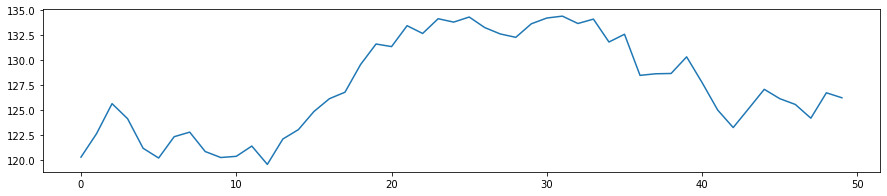

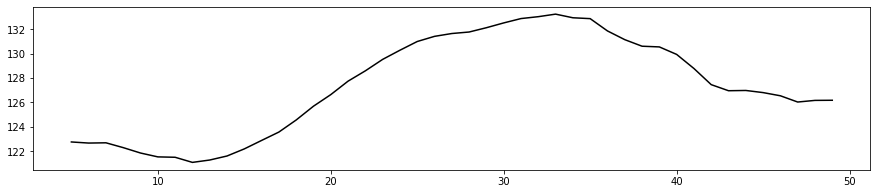

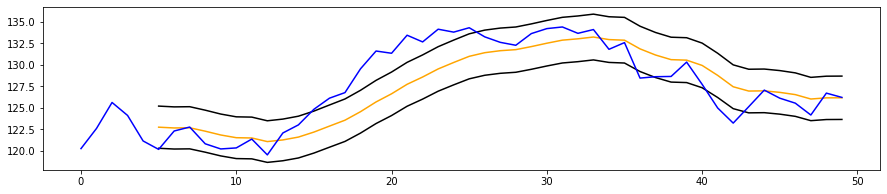

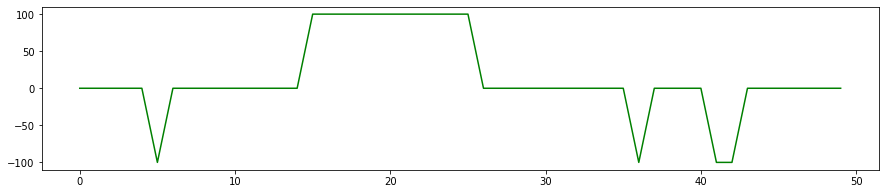

In [15]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(plot_width, plot_length))
ax1 = plt.subplot()
plt.plot(np.arange(price_list.size), price_list)

figure(figsize=(plot_width, plot_length))
ax2 = plt.subplot()
plt.plot(np.arange(x1.size), x1, color = 'black')

figure(figsize=(plot_width, plot_length))
ax3 = plt.subplot()
plt.plot(np.arange(up_bol.size), up_bol, color = 'black')
plt.plot(np.arange(mcg_array.size), mcg_array, color = 'orange')
plt.plot(np.arange(down_bol.size), down_bol, color = 'black')
plt.plot(np.arange(price_list.size), price_list, color = 'blue')

figure(figsize=(plot_width, plot_length))
ax4 = plt.subplot()
plt.plot(np.arange(bias_array.size), bias_array, color = 'green')

plt.show()



In [16]:
def efficacy_generator (price_array, bias_array, stop_loss_percent = 0.3):
    long_book = [0 for i in range(price_array.size)]
    short_book = [0 for i in range(price_array.size)]
    long_pos = []
    short_pos = []
    long_positions = []
    short_positions = []
    long_cash = 0
    short_cash = 0
    stop_loss_flag = False
    short_position_flag = False
    long_position_flag = False
    sub_stop = (max(price_array) - min(price_array))*stop_loss_percent
    
    ctr = 0
    for i,j in zip(price_array, bias_array):
        if (stop_loss_flag):
            if(j == 100 or j == -100):
                stop_loss_flag = False                 
        elif (stop_loss_flag == False  and short_position_flag == False and long_position_flag == False):
            if(j == 100):
                long_position_flag = True
                long_pos.append(i)
                long_book[ctr] = i
            elif(j == -100):
                short_position_flag = True
                short_pos.append(i)
                short_book[ctr] = i
        elif(stop_loss_flag == False  and short_position_flag == True):
            short_pos.append(i)
            short_book[ctr] = i
            if (i > (min(short_pos) + sub_stop)):
                short_position_flag = False
                stop_loss_flag = True
                short_positions.append(short_pos)
                short_pos = []
            elif(j == 100):
                short_position_flag = False
                long_position_flag = True
                short_positions.append(short_pos)
                short_pos = []
            elif(j == 0):
                short_position_flag = False
                short_positions.append(short_pos)
                short_pos = []
        elif(stop_loss_flag == False and long_position_flag == True):
            long_pos.append(i)
            long_book[ctr] = i
            if (i < (max(long_pos) - sub_stop)):
                long_position_flag = False
                stop_loss_flag = True
                long_positions.append(long_pos)
                long_pos = []
            elif (j == 0):
                long_position_flag = False
                long_positions.append(long_pos)
                long_pos = []
            elif(j == -100):
                long_position_flag = False
                short_position_flag = True
                long_positions.append(long_pos)
                long_pos = []
                
        ctr += 1
        
    if (long_pos != []):
        long_positions.append(long_pos)
    if (short_pos != []):
        short_positions.append(short_pos)
    
    for i in long_positions:
        long_cash += (i[-1] - i[0])
    for i in short_positions:
        short_cash += (i[0] - i[-1])
    
    out = (long_cash+short_cash)/sub_stop
    print(out)
    return long_book,short_book

In [17]:
start = time.time()
test = efficacy_generator(price_array = price_list, bias_array = bias_array)
end = time.time()
efficacy_time = end - start
print(test)

1.3387060667114405
([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 124.83, 126.12, 126.77, 129.54, 131.61, 131.35, 133.45, 132.67, 134.15, 133.81, 134.32, 133.26, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 120.16, 122.3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 128.46, 128.62, 0, 0, 0, 124.98, 123.22, 125.13, 0, 0, 0, 0, 0, 0])


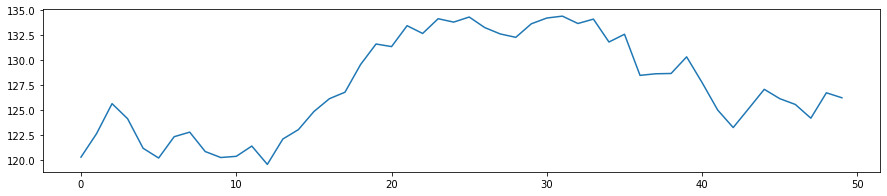

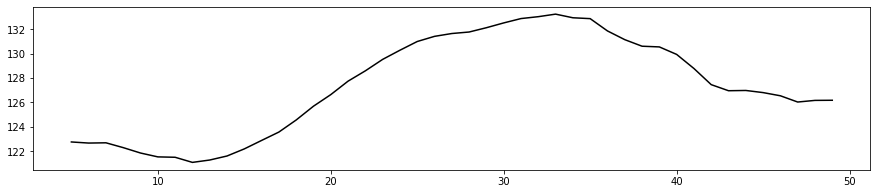

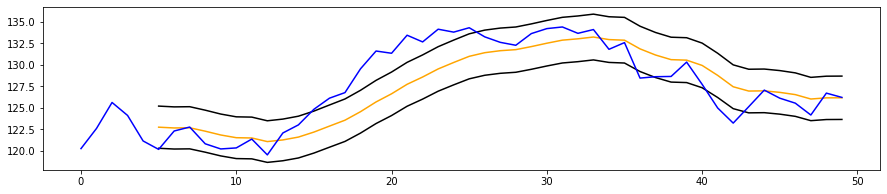

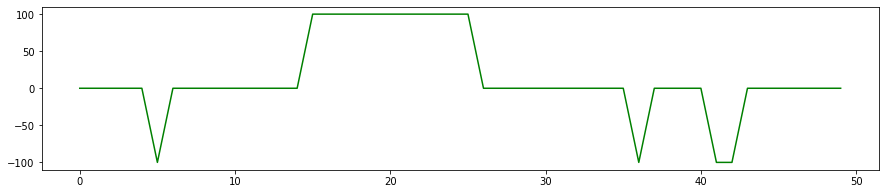

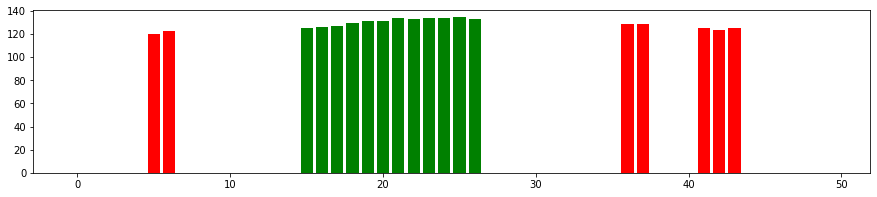

In [18]:
figure(figsize=(plot_width, plot_length))
ax1 = plt.subplot()
plt.plot(np.arange(price_list.size), price_list)

figure(figsize=(plot_width, plot_length))
ax2 = plt.subplot()
plt.plot(np.arange(x1.size), x1, color = 'black')

figure(figsize=(plot_width, plot_length))
ax3 = plt.subplot()
plt.plot(np.arange(up_bol.size), up_bol, color = 'black')
plt.plot(np.arange(mcg_array.size), mcg_array, color = 'orange')
plt.plot(np.arange(down_bol.size), down_bol, color = 'black')
plt.plot(np.arange(price_list.size), price_list, color = 'blue')

figure(figsize=(plot_width, plot_length))
ax4 = plt.subplot()
plt.plot(np.arange(bias_array.size), bias_array, color = 'green')

figure(figsize=(plot_width, plot_length))
ax5 = plt.subplot()
plt.bar(np.arange(bias_array.size), test[0], color = 'green')
plt.bar(np.arange(bias_array.size), test[1], color = 'red')

plt.show()

In [19]:
print(
    "Diagnostics \n" +
    "Function Load Time: " + str(function_time) + "\n" + 
    "Indicator Generations Time: " + str(indic_generation_time) + "\n" + 
    "Bias Load Time: " + str(bias_time) + "\n" + 
    "Efficacy Value Load time: " + str(efficacy_time) + "\n"
    "Total Time: " + str(function_time+indic_generation_time+bias_time+efficacy_time)
    )

Diagnostics 
Function Load Time: 0.002995729446411133
Indicator Generations Time: 0.002996683120727539
Bias Load Time: 0.0
Efficacy Value Load time: 0.0010008811950683594
Total Time: 0.006993293762207031
